In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [53]:
train = pd.read_csv('train.csv')

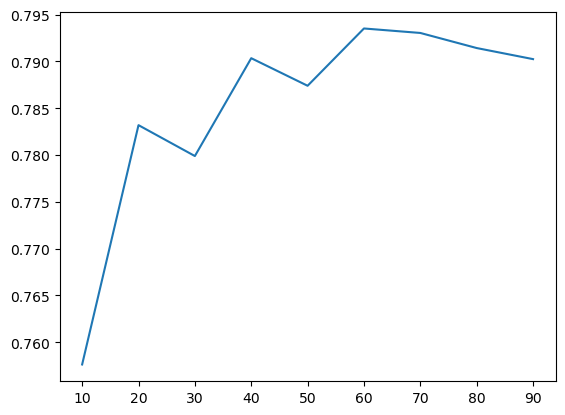

In [156]:
plt.plot(a,b)

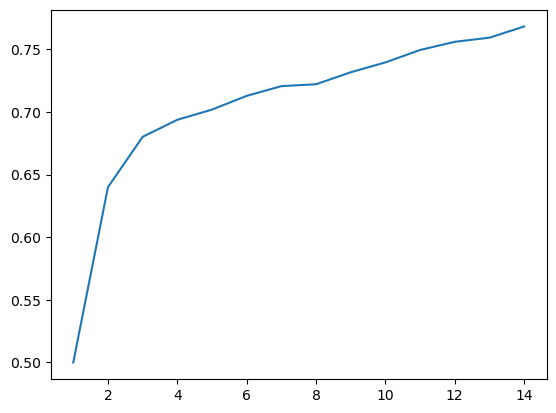

In [98]:
import matplotlib.pyplot as plt
plt.plot(a,b)

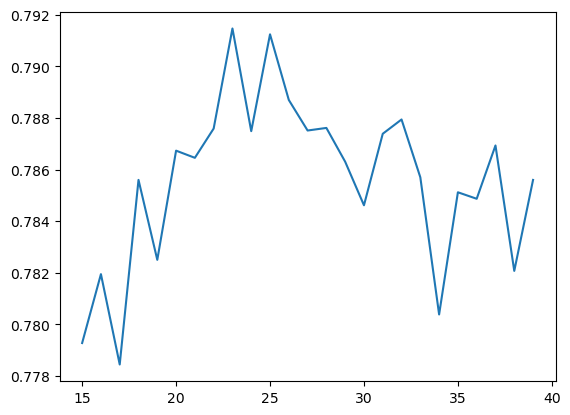

In [100]:
plt.plot(a,b)

In [152]:
rfc.feature_importances_

array([0.04117872, 0.09614989, 0.0447018 , 0.05224128, 0.02924578,
       0.02936827, 0.04832941, 0.04499439, 0.0517673 , 0.07220028,
       0.05298762, 0.05809266, 0.11836192, 0.00487163, 0.04397482,
       0.04631149, 0.05223688, 0.10465662, 0.00832924])

In [ ]:
params ={'n_estimators':[50,70,100] , 'max_depth':[5,10,30]}

gscv=GridSearchCV(rfc,param_grid=params , verbose=1 ,cv=3 , scoring='neg_mean_squared_error')

gscv.fit(X_train,y_train)

gscv.best_params_

In [120]:
test= pd.read_csv('test_dataset.csv')

In [121]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,170,65,75.1,1.0,0.9,1,1,120,70,...,260,41,132,15.7,1,0.8,24,26,32,0
1,45,170,75,89.0,0.7,1.2,1,1,100,67,...,345,49,140,15.7,1,1.1,26,28,138,0
2,30,180,90,94.0,1.0,0.8,1,1,115,72,...,103,53,103,13.5,1,1.0,19,29,30,0
3,60,170,50,73.0,0.5,0.7,1,1,118,78,...,70,65,108,14.1,1,1.3,31,28,33,0
4,30,170,65,78.0,1.5,1.0,1,1,110,70,...,210,45,103,14.7,1,0.8,21,21,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,60,165,65,82.0,0.7,1.0,1,1,101,68,...,131,41,110,13.5,1,0.8,78,75,33,0
16704,60,155,70,93.0,0.8,1.0,1,1,134,70,...,259,53,60,13.9,1,0.7,19,28,28,1
16705,40,155,50,67.2,0.9,0.8,1,1,134,80,...,50,64,131,13.4,1,0.7,16,10,14,0
16706,35,165,70,76.1,1.0,1.0,1,1,114,68,...,43,74,118,14.3,1,1.2,19,28,30,1


In [7]:
import lightgbm as lgb

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_test, y_test)

In [ ]:

# params = {
#     "objective": "binary",
#     "metrics": "roc"
# }


params = {     
    'boosting_type':'gbdt',#ブースティングの種類。ここでは勾配ブースティング
    'objective':'cross_entropy',#機械学習タスクの種類。ここでは二値分類     
    'metric':'auc',#モデルの評価指標     
    'num_leaves':23,#決定木の葉(ノード)の数。大きいほど複雑になる     
    'learning_rate':0.1,#学習率     
    'n_estimators':100,#作成する木の数     
    'random_state':1234 #乱数のシード値
    }

# model = lgb.train(params,dtrain)

model = lgb.train(params, dtrain, valid_sets=dvalid, num_boost_round=1000)

In [48]:
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

In [49]:
y_pred_dev = np.where(y_pred < 0.5, 0, 1)
roc_auc_score(y_test, y_pred)

0.8640326562279589

<AxesSubplot:ylabel='Count'>

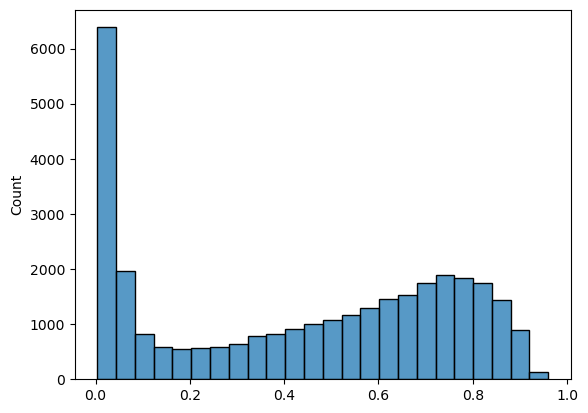

In [46]:
sns.histplot(y_pred)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# x=np.arange(1,11,1)
# y=x


# plt.plot(x,y,c='r')

In [27]:
y_test

,smoking
27900,0
17724,0
38068,0
34072,0
11683,0
...,...
16933,1
26131,1
16934,0
3894,0


<AxesSubplot:ylabel='Count'>

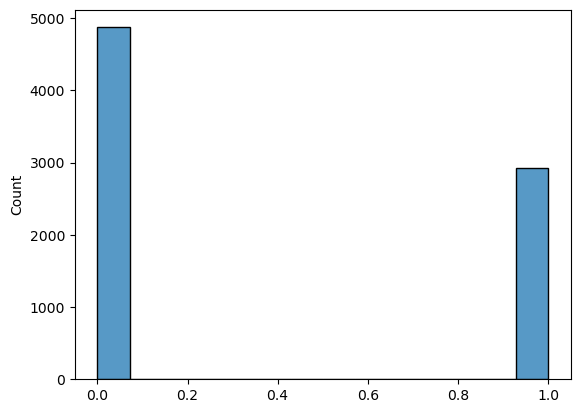

In [49]:
sns.histplot(y_pred)

In [43]:
y_pred = np.where(y_pred < 0.4, 0, 1)


In [29]:
test=pd.read_csv('test.csv')

In [30]:
test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [31]:
test_y = model.predict(test[['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']])

In [32]:
test['pred'] = test_y

In [34]:
test=test[['id','pred']]

In [35]:
test.to_csv('submit.csv')

In [36]:
test

,id,pred
0,159256,0.623319
1,159257,0.157945
2,159258,0.407659
3,159259,0.025472
4,159260,0.664233
...,...,...
106166,265422,0.698704
106167,265423,0.644521
106168,265424,0.469185
106169,265425,0.077156
